In [1]:
# from google.colab import drive
# drive.mount('/content/gdrive')


In [2]:
# cd gdrive

In [3]:
# cd MyDrive

In [4]:
# cd ML/Project/

Preprocessing


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve 
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import svm 
import tensorflow as tf
from tensorflow.keras import layers
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, recall_score, precision_score, f1_score
import warnings
from sklearn.ensemble import BaggingClassifier
warnings.filterwarnings("ignore")

In [6]:
data = pd.read_csv("credit_train.csv")
data.head(2)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0


Checking and filling Null Values

In [7]:
data[list(data.columns)].isnull().sum()


Loan ID                           514
Customer ID                       514
Loan Status                       514
Current Loan Amount               514
Term                              514
Credit Score                    19668
Annual Income                   19668
Years in current job             4736
Home Ownership                    514
Purpose                           514
Monthly Debt                      514
Years of Credit History           514
Months since last delinquent    53655
Number of Open Accounts           514
Number of Credit Problems         514
Current Credit Balance            514
Maximum Open Credit               516
Bankruptcies                      718
Tax Liens                         524
dtype: int64

In [8]:
data.drop(labels=['Months since last delinquent'], axis=1, inplace=True)
data.shape

(100514, 18)

In [9]:
data.drop(labels=['Loan ID', 'Customer ID','Number of Open Accounts'], axis=1, inplace=True)
data.drop(data.tail(514).index, inplace=True)
data.shape

(100000, 15)

In [10]:
data[list(data.columns)].isnull().sum()

Loan Status                      0
Current Loan Amount              0
Term                             0
Credit Score                 19154
Annual Income                19154
Years in current job          4222
Home Ownership                   0
Purpose                          0
Monthly Debt                     0
Years of Credit History          0
Number of Credit Problems        0
Current Credit Balance           0
Maximum Open Credit              2
Bankruptcies                   204
Tax Liens                       10
dtype: int64

In [11]:

for i in data['Maximum Open Credit'][data['Maximum Open Credit'].isnull() == True].index:
    data.drop(labels=i, inplace=True)
for i in data['Tax Liens'][data['Tax Liens'].isnull() == True].index:
    data.drop(labels=i, inplace=True)  
for i in data['Credit Score'][data['Credit Score'].isnull() == True].index:
    data.drop(labels=i, inplace=True)  
for i in data['Annual Income'][data['Annual Income'].isnull() == True].index:
    data.drop(labels=i, inplace=True)  
# for i in data['Years in current job'][data['Years in current job'].isnull() == True].index:
#     data.drop(labels=i, inplace=True)  
for i in data['Current Loan Amount'][data['Current Loan Amount']>30000000].index:
    data.drop(labels=i, inplace=True)  
# for i in data['Credit Score '][data['Credit Score']>=850].index:
#     data.drop(labels=i, inplace=True)  
for i in data['Bankruptcies'][data['Bankruptcies'].isnull() == True].index:
    data.drop(labels=i, inplace=True)  

In [12]:
filtered_df = data[data['Credit Score'] > 850]

    # Drop the filtered rows from the original dataframe
data.drop(filtered_df.index, inplace=True)

In [13]:
data.shape

(64686, 15)

In [14]:
data[list(data.columns)].isnull().sum()

Loan Status                     0
Current Loan Amount             0
Term                            0
Credit Score                    0
Annual Income                   0
Years in current job         2738
Home Ownership                  0
Purpose                         0
Monthly Debt                    0
Years of Credit History         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
dtype: int64

In [15]:
data['Years in current job'].unique()

array(['8 years', '3 years', '< 1 year', '2 years', '10+ years',
       '4 years', '5 years', '1 year', '7 years', '6 years', '9 years',
       nan], dtype=object)

In [16]:

# plt.figure(figsize=(12, 6))
# chart = sns.countplot(data['Years in current job'])
# chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
# plt.show()

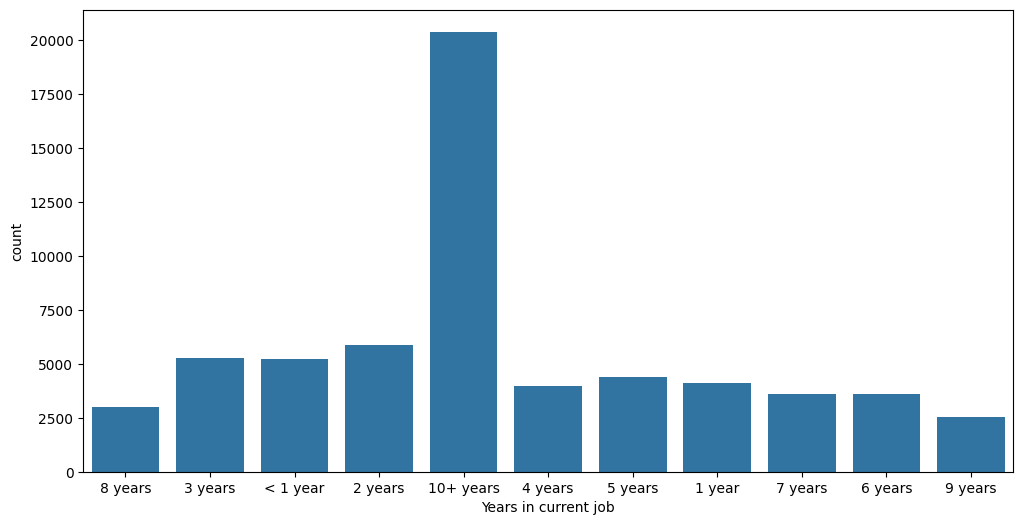

In [17]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Years in current job',data=data)
plt.show()

In [18]:
data.fillna('10+ years', inplace=True)
data[list(data.columns)].isnull().sum()

Loan Status                  0
Current Loan Amount          0
Term                         0
Credit Score                 0
Annual Income                0
Years in current job         0
Home Ownership               0
Purpose                      0
Monthly Debt                 0
Years of Credit History      0
Number of Credit Problems    0
Current Credit Balance       0
Maximum Open Credit          0
Bankruptcies                 0
Tax Liens                    0
dtype: int64

Checking Distribution of Data

In [19]:
# sns.pairplot(data,hue="Loan Status")

In [20]:
bi_pkl=pd.get_dummies(data['Loan Status'], drop_first=True)
con_pkl=pd.concat([data,bi_pkl],axis=1)
con_pkl.shape


(64686, 16)

In [21]:
data=con_pkl
data.drop(['Loan Status'],axis=1, inplace=True)
data.shape

(64686, 15)

Checking Correlation

In [22]:
# plt.figure(figsize=(12,10))
# cor = data.corr()
# sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
# plt.show()

In [23]:
data.head(10) 

,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Fully Paid
0,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,1.0,228190.0,416746.0,1.0,0.0,True
3,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,0.0,256329.0,386958.0,0.0,0.0,True
6,217646.0,Short Term,730.0,1184194.0,< 1 year,Home Mortgage,Debt Consolidation,10855.08,19.6,1.0,122170.0,272052.0,1.0,0.0,True
8,548746.0,Short Term,678.0,2559110.0,2 years,Rent,Debt Consolidation,18660.28,22.6,0.0,437171.0,555038.0,0.0,0.0,True
9,215952.0,Short Term,739.0,1454735.0,< 1 year,Rent,Debt Consolidation,39277.75,13.9,0.0,669560.0,1021460.0,0.0,0.0,True
14,234124.0,Short Term,727.0,693234.0,10+ years,Rent,Debt Consolidation,14211.24,24.7,1.0,28291.0,107052.0,1.0,0.0,True
17,666204.0,Long Term,723.0,1821967.0,10+ years,Home Mortgage,Debt Consolidation,17612.24,22.0,0.0,813694.0,2004618.0,0.0,0.0,True
19,390390.0,Short Term,747.0,1791738.0,8 years,Home Mortgage,Home Improvements,2478.55,22.7,0.0,121182.0,801812.0,0.0,0.0,True
20,317108.0,Long Term,687.0,1133274.0,8 years,Rent,Debt Consolidation,9632.81,17.4,0.0,60287.0,126940.0,0.0,0.0,False
21,128238.0,Short Term,750.0,1354073.0,< 1 year,Rent,Debt Consolidation,13202.15,11.9,0.0,131936.0,458788.0,0.0,0.0,True


One-Hot encoding and label encoding

In [24]:
categorical_subset = data[['Term', 'Years in current job', 'Home Ownership', 'Purpose']]
categorical_subset = pd.get_dummies(categorical_subset)
categorical_subset.head()


,Term_Long Term,Term_Short Term,Years in current job_1 year,Years in current job_10+ years,Years in current job_2 years,Years in current job_3 years,Years in current job_4 years,Years in current job_5 years,Years in current job_6 years,Years in current job_7 years,...,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,True,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [25]:
data.drop(labels=['Term', 'Years in current job', 'Home Ownership', 'Purpose'], axis=1, inplace=True)


In [26]:
data = pd.concat([data, categorical_subset], axis = 1)

In [27]:
data.drop(labels=['Number of Credit Problems'], axis=1, inplace=True)

In [28]:
data.shape

(64686, 43)

In [29]:
data.head()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Fully Paid,...,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
0,445412.0,709.0,1167493.0,5214.74,17.2,228190.0,416746.0,1.0,0.0,True,...,False,False,False,False,False,False,False,False,False,False
3,347666.0,721.0,806949.0,8741.90,12.0,256329.0,386958.0,0.0,0.0,True,...,False,False,False,False,False,False,False,False,False,False
6,217646.0,730.0,1184194.0,10855.08,19.6,122170.0,272052.0,1.0,0.0,True,...,False,False,False,False,False,False,False,False,False,False
8,548746.0,678.0,2559110.0,18660.28,22.6,437171.0,555038.0,0.0,0.0,True,...,False,False,False,False,False,False,False,False,False,False
9,215952.0,739.0,1454735.0,39277.75,13.9,669560.0,1021460.0,0.0,0.0,True,...,False,False,False,False,False,False,False,False,False,False


In [30]:
X = data.drop(columns='Fully Paid')
Y = pd.DataFrame(data['Fully Paid'])


In [31]:
# from sklearn.decomposition import PCA
# pca=PCA(5) #feature from 41 to 5
# pcaX=pca.fit_transform(X)
# print("Features after PCA:",len(pcaX[0]))
# X_train, X_test, y_train, y_test = train_test_split(pcaX, y,stratify=y,test_size=0.20,random_state = 1)


In [32]:
print(np.sum(Y == 1))
print(np.sum(Y == 0))

Fully Paid    52055
dtype: int64
Fully Paid    12631
dtype: int64


In [33]:
# x_train

In [34]:
# !pip install imblearn

Oversampling and maintaining the Ratio of labels

In [35]:
from imblearn.over_sampling import BorderlineSMOTE
oversample = BorderlineSMOTE()
X, Y = oversample.fit_resample(X, Y)

In [36]:
print(np.sum(Y == 1))
print(np.sum(Y == 0))

Fully Paid    52055
dtype: int64
Fully Paid    52055
dtype: int64


In [37]:
len(X)

104110

Spliting into Train and test

In [38]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1,stratify=Y)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(83288, 42) (20822, 42) (83288, 1) (20822, 1)


In [39]:
print(np.sum(y_train == 1))
print(np.sum(y_train == 0))

Fully Paid    41644
dtype: int64
Fully Paid    41644
dtype: int64


In [40]:
x_train

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Term_Long Term,...,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
49857,368984.000000,651.000000,7.175540e+05,19134.900000,11.800000,282283.000000,4.405060e+05,0.000000,0.0,True,...,False,True,False,False,False,False,False,False,False,False
86454,126429.789986,723.504807,4.804135e+05,8970.964961,10.439814,76836.913327,3.362769e+05,0.000000,0.0,False,...,False,False,False,False,False,False,False,False,False,False
70262,316079.620703,711.148212,9.623665e+05,17745.426327,17.218910,146856.502875,2.435114e+05,0.112436,0.0,False,...,False,False,False,False,False,False,False,False,False,False
41820,215028.000000,730.000000,1.578501e+06,32227.800000,17.000000,388056.000000,6.382420e+05,1.000000,0.0,False,...,False,False,False,False,False,True,False,False,False,False
50867,402292.000000,665.000000,7.720840e+05,16792.770000,37.200000,423263.000000,6.381320e+05,0.000000,0.0,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42145,138798.000000,741.000000,5.178260e+05,11392.020000,17.700000,137674.000000,6.642680e+05,0.000000,0.0,False,...,False,False,False,False,False,False,False,False,False,False
85417,149027.673700,686.352175,6.256392e+05,6749.769354,14.497149,66550.277361,1.015458e+05,0.000000,0.0,False,...,False,False,False,False,False,False,False,False,False,False
84992,183891.896548,730.832546,1.419881e+06,35943.312796,20.651691,594966.094135,1.410905e+06,0.000000,0.0,False,...,False,False,False,False,False,False,False,False,False,False
20823,178596.000000,736.000000,1.060466e+06,1599.610000,19.800000,48431.000000,2.608540e+05,0.000000,0.0,False,...,False,False,False,False,False,False,False,False,False,False


In [41]:
y_train

,Fully Paid
49857,True
86454,False
70262,False
41820,True
50867,True
...,...
42145,True
85417,False
84992,False
20823,True


In [42]:
x_test

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Term_Long Term,...,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
61174,215160.000000,732.000000,1.892514e+06,24602.720000,9.800000,3.233990e+05,3.852420e+05,0.0,0.0,False,...,False,False,False,False,False,False,False,False,False,False
5683,625614.000000,749.000000,3.087424e+06,35505.300000,14.900000,1.794512e+06,1.259302e+07,0.0,0.0,False,...,False,False,False,False,False,False,False,False,False,False
57675,300608.000000,744.000000,6.490400e+05,19363.090000,10.000000,2.615160e+05,4.829220e+05,0.0,0.0,False,...,False,False,False,False,False,False,False,False,False,False
26691,221320.000000,741.000000,9.557000e+05,10353.480000,9.400000,2.167330e+05,5.174180e+05,0.0,0.0,False,...,False,False,False,False,False,False,False,False,False,False
99627,265513.443200,667.262879,1.175155e+06,22908.873884,17.001658,6.045375e+05,7.339360e+05,0.0,0.0,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84421,220809.919798,743.128235,1.525596e+06,15550.474908,16.251294,9.060548e+04,1.860852e+05,0.0,0.0,False,...,False,False,False,False,False,False,False,False,False,False
85344,459552.396116,702.335569,1.142837e+06,27700.743121,29.599780,5.678108e+05,9.168058e+05,0.0,0.0,True,...,False,False,False,False,False,False,False,False,False,False
83896,327176.026048,743.638633,8.136116e+05,16729.734729,16.867499,2.121417e+05,5.495641e+05,0.0,0.0,False,...,False,False,False,False,False,False,False,False,False,False
52489,109054.000000,745.000000,1.036013e+06,25123.320000,22.000000,1.408660e+05,4.493280e+05,0.0,0.0,False,...,False,False,False,False,False,True,False,False,False,False


In [43]:
y_test

,Fully Paid
61174,False
5683,True
57675,True
26691,True
99627,False
...,...
84421,False
85344,False
83896,False
52489,True


Normalization

In [44]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


In [45]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)

# Fit the encoder on the data to learn the categories
encoder.fit(y_train)

# Transform the data into one-hot encoded format
y_train = encoder.transform(y_train)


In [46]:
encoder = OneHotEncoder(sparse=False)

# Fit the encoder on the data to learn the categories
encoder.fit(y_test)

# Transform the data into one-hot encoded format
y_test = encoder.transform(y_test)


In [47]:
y_train

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [48]:
y_train.shape

(83288, 2)

In [49]:
y_train=y_train[:,1]
y_test=y_test[:,1]

In [50]:
y_train

array([1., 0., 0., ..., 0., 1., 0.])

In [51]:
y_test

array([0., 1., 1., ..., 0., 1., 0.])

Base Model Logistic Regression and It's Results

In [52]:

import numpy as np
acc_score_test = []
acc_score_train = []

kf = KFold(n_splits=5)
for train_index, test_index in kf.split(x_train):
    xtrain, xtest = x_train[train_index], x_train[test_index]
    ytrain, ytest = y_train[train_index], y_train[test_index]

    xb=LogisticRegression()

    xb.fit(xtrain,ytrain)
    pred1 = xb.predict(xtest)
    pred2=xb.predict(xtrain)
    acc_score_test.append(accuracy_score(pred1, ytest))
    acc_score_train.append(accuracy_score(pred2, ytrain))

print("test accuracy ",acc_score_test)
print("train accuracy ",acc_score_train)

test accuracy  [0.8653499819906352, 0.8618081402329211, 0.8636090767198944, 0.8646815152788617, 0.8640811670769046]
train accuracy  [0.8636199909950473, 0.8644304367402071, 0.8640102056130872, 0.8637571100538788, 0.8638921823175398]


In [53]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
pred=lr.predict(x_test)

In [54]:
from sklearn.metrics import roc_curve, auc

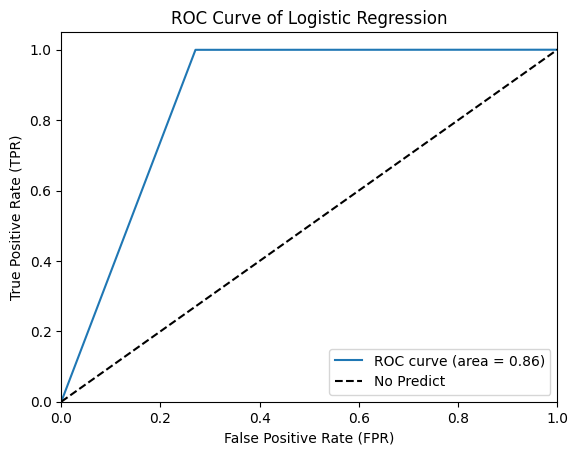

In [55]:
fpr, tpr, thresholds = roc_curve(y_test, pred)

# Calculate Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Predict')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve of Logistic Regression')
plt.legend(loc="lower right")
plt.show()

In [56]:
print("score using logistic regression(base moel) " ,lr.score(x_test, y_test))
print(classification_report(y_test,pred ))
print('ROC-AUC-Score' , roc_auc_score(y_test,pred))

score using logistic regression(base moel)  0.8645663240802997
              precision    recall  f1-score   support

         0.0       1.00      0.73      0.84     10411
         1.0       0.79      1.00      0.88     10411

    accuracy                           0.86     20822
   macro avg       0.89      0.86      0.86     20822
weighted avg       0.89      0.86      0.86     20822

ROC-AUC-Score 0.8645663240802997


In [57]:
x_test[0]

array([-0.55898248,  0.67809529,  0.66383718,  0.50578953, -1.24771373,
        0.08974052, -0.048039  , -0.35714856, -0.12426214, -0.80483936,
        0.59297314, -0.30557666, -0.89084702, -0.37056311, -0.34613371,
       -0.29493105, -0.32083203, -0.28581538, -0.28549577, -0.25990097,
        4.17109771, -0.35517979, -0.05027668, -1.10966971, -0.37592868,
        0.94970697, -0.16176909, -0.09377309, -0.1201378 ,  0.43290054,
       -0.03252218, -0.28451078, -0.12187434, -0.20429896, -0.08813666,
       -0.06814676, -0.04261783, -0.30369395, -0.01386151, -0.07716519,
       -0.03196244, -0.03586574])

In [58]:
y_test[3]

1.0

In [59]:
lr.predict([x_test[3]])

array([1.])

In [60]:
x_train

array([[ 0.26919001, -2.22276605, -0.70100628, ..., -0.07716519,
        -0.03196244, -0.03586574],
       [-1.03669675,  0.37385607, -0.97647066, ..., -0.07716519,
        -0.03196244, -0.03586574],
       [-0.01564169, -0.06867193, -0.41663   , ..., -0.07716519,
        -0.03196244, -0.03586574],
       ...,
       [-0.72732671,  0.63628514,  0.11482273, ..., -0.07716519,
        -0.03196244, -0.03586574],
       [-0.75583927,  0.82134771, -0.3026768 , ..., -0.07716519,
        -0.03196244, -0.03586574],
       [ 0.18464702, -3.03958382, -0.34425522, ..., -0.07716519,
        -0.03196244, -0.03586574]])

In [61]:
y_train

array([1., 0., 0., ..., 0., 1., 0.])

In [62]:
cf_matrix= confusion_matrix(y_test, pred)
# (tn, fp, fn, tp)
cf_matrix

array([[ 7594,  2817],
       [    3, 10408]], dtype=int64)

Logistic Regression Confusion Matrix

<Axes: >

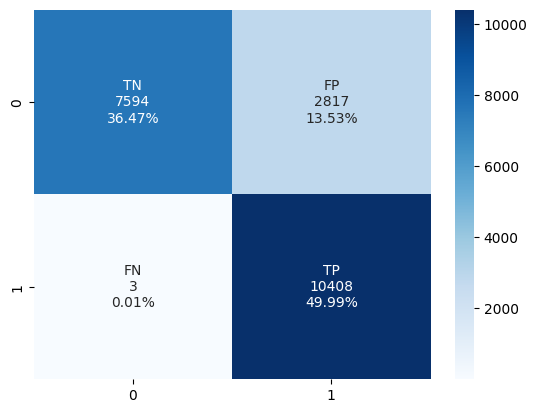

In [63]:


group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

Checking underfit and overfit

In [64]:
# y_train.isna().sum()

In [65]:
x_train

array([[ 0.26919001, -2.22276605, -0.70100628, ..., -0.07716519,
        -0.03196244, -0.03586574],
       [-1.03669675,  0.37385607, -0.97647066, ..., -0.07716519,
        -0.03196244, -0.03586574],
       [-0.01564169, -0.06867193, -0.41663   , ..., -0.07716519,
        -0.03196244, -0.03586574],
       ...,
       [-0.72732671,  0.63628514,  0.11482273, ..., -0.07716519,
        -0.03196244, -0.03586574],
       [-0.75583927,  0.82134771, -0.3026768 , ..., -0.07716519,
        -0.03196244, -0.03586574],
       [ 0.18464702, -3.03958382, -0.34425522, ..., -0.07716519,
        -0.03196244, -0.03586574]])

In [66]:
y_train

array([1., 0., 0., ..., 0., 1., 0.])

In [67]:
# y_train = y_train.reset_index(drop=True)

In [68]:
# y_test = y_test.reset_index(drop=True)

In [69]:
x_test

array([[-0.55898248,  0.67809529,  0.66383718, ..., -0.07716519,
        -0.03196244, -0.03586574],
       [ 1.65085937,  1.28691805,  2.05185472, ..., -0.07716519,
        -0.03196244, -0.03586574],
       [-0.09893929,  1.10785253, -0.78059272, ..., -0.07716519,
        -0.03196244, -0.03586574],
       ...,
       [ 0.04410021,  1.09491085, -0.589425  , ..., -0.07716519,
        -0.03196244, -0.03586574],
       [-1.1302462 ,  1.14366563, -0.33108162, ..., -0.07716519,
        -0.03196244, -0.03586574],
       [ 2.12418392,  0.30917242,  3.71774368, ..., -0.07716519,
        -0.03196244, -0.03586574]])

In [70]:
y_test

array([0., 1., 1., ..., 0., 1., 0.])

In [71]:


# import numpy as np
# acc_score_test = []
# acc_score_train = []

# kf = KFold(n_splits=5)
# for train_index, test_index in kf.split(x_train):
#     xtrain, xtest = x_train[train_index], x_train[test_index]
#     ytrain, ytest = y_train[train_index], y_train[test_index]

#     xb=LogisticRegression()

#     xb.fit(xtrain,ytrain)
#     pred1 = xb.predict(xtest)
#     pred2=xb.predict(xtrain)
#     acc_score_test.append(accuracy_score(pred1, ytest))
#     acc_score_train.append(accuracy_score(pred2, ytrain))

# print("test accuracy ",acc_score_test)
# print("train accuracy ",acc_score_train)

In [72]:


# import numpy as np
# acc_score_test = []
# acc_score_train = []

# kf = KFold(n_splits=5)
# xtrain, xtest
# for train_index, test_index in kf.split(x_train):
#     xtrain, xtest = x_train[train_index], x_train[test_index]
# # for train_index, test_index in kf.split(y_train):
#     ytrain, ytest = y_train[train_index], y_train[test_index]

#     xb=RandomForestClassifier(criterion='gini',max_depth=None,max_features='log2',n_estimators=500)

#     xb.fit(xtrain,ytrain)
#     pred1 = xb.predict(xtest)
#     pred2=xb.predict(xtrain)
#     acc_score_test.append(accuracy_score(pred1, ytest))
#     acc_score_train.append(accuracy_score(pred2, ytrain))

# print("test accuracy ",acc_score_test)
# print("train accuracy ",acc_score_train)

Spliting Train into train and validation for tuning

In [73]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size = 0.1, random_state = 1,stratify=y_train)
print(x_train.shape, x_valid.shape,x_test.shape, y_train.shape, y_valid.shape,y_test.shape)

(74959, 42) (8329, 42) (20822, 42) (74959,) (8329,) (20822,)


TSNE for 30000 datasets

In [74]:
from sklearn.manifold import TSNE
min_d = min(30000, len(y_train))
tsne_xtrain = TSNE(n_components=2) 

tsne_xtrain=tsne_xtrain.fit_transform(x_train[0:min_d])



data = np.array(np.hstack((tsne_xtrain, np.mat(y_train[0:min_d]).transpose()))).astype('float32')
data
# dd=pd.DataFrame(data, columns=['col1'])
# sns.scatterplot(data=data,x=data[:,0],y=data[:,1],hue=data[:,2])
# plt.title("TSNE hidden layer visualisation of "+self.activation+" function")
# plt.show()

array([[-78.861946 ,  46.45317  ,   0.       ],
       [ 54.92529  ,  52.53297  ,   1.       ],
       [ 66.95678  ,  25.413086 ,   1.       ],
       ...,
       [ 30.37574  , -86.20617  ,   0.       ],
       [  5.999063 ,   5.8663864,   0.       ],
       [ 25.023058 , -65.023964 ,   0.       ]], dtype=float32)

In [75]:
data.shape

(30000, 3)

In [76]:
dd=pd.DataFrame(data, columns=['col1','col2','col3'])

<Axes: xlabel='col1', ylabel='col2'>

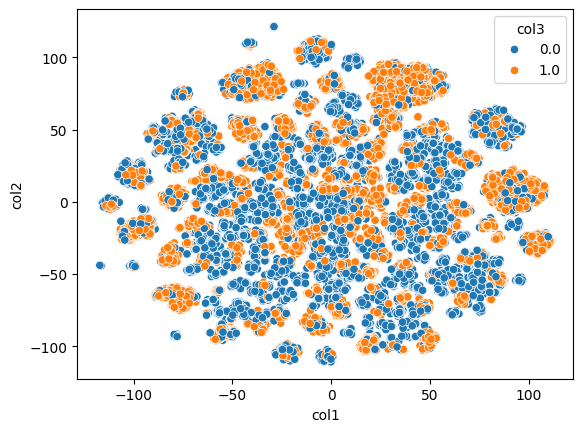

In [77]:
sns.scatterplot(data=dd,x=dd['col1'],y=dd['col2'],hue=dd['col3'])

In [78]:
print(np.sum(y_train == 1))
print(np.sum(y_train == 0))

37479
37480


In [79]:
len(x_valid)

8329

In [80]:
import pickle

In [81]:
pickle.dump(lr,open('logisticregression.pkl','wb'))

Advanced Models and their Tuning

1. Random Forest classifier and it's tuning

In [82]:
rfc=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(x_valid, y_valid)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [83]:
rfc=RandomForestClassifier(criterion='gini',max_depth=None,max_features='log2',n_estimators=500)
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)
print("score for RF classifier using hyperparameter ",rfc.score(x_test,y_test))
print(classification_report(y_test,y_pred))
print('ROC-AUC-Score' , roc_auc_score(y_test,y_pred))

score for RF classifier using hyperparameter  0.8812794160023053
              precision    recall  f1-score   support

         0.0       0.98      0.78      0.87     10411
         1.0       0.81      0.99      0.89     10411

    accuracy                           0.88     20822
   macro avg       0.90      0.88      0.88     20822
weighted avg       0.90      0.88      0.88     20822

ROC-AUC-Score 0.8812794160023053


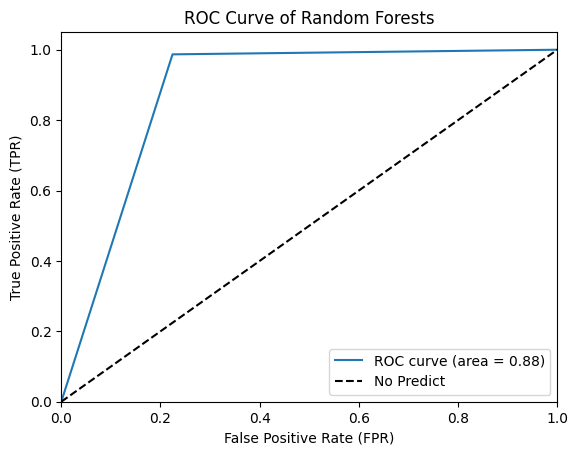

In [84]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Predict')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve of Random Forests')
plt.legend(loc="lower right")
plt.show()

In [85]:
cf_matrix= confusion_matrix(y_test, y_pred)
# (tn, fp, fn, tp)
cf_matrix

array([[ 8076,  2335],
       [  137, 10274]], dtype=int64)

<Axes: >

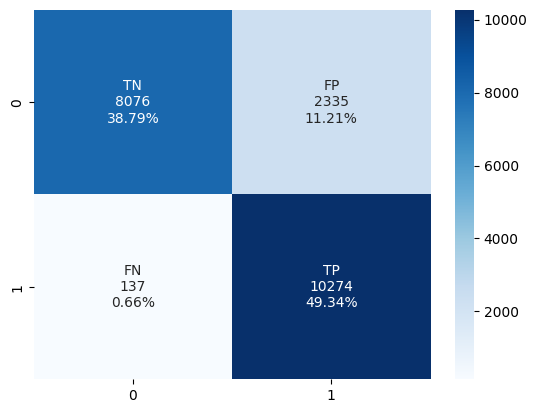

In [86]:
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

Checking underfit and overfit

In [87]:


import numpy as np
acc_score_test = []
acc_score_train = []

kf = KFold(n_splits=5)

for train_index, test_index in kf.split(x_train):

    xtrain, xtest = x_train[train_index], x_train[test_index]
    ytrain, ytest = y_train[train_index], y_train[test_index]

    xb=RandomForestClassifier(criterion='gini',max_depth=None,max_features='log2',n_estimators=500)

    xb.fit(xtrain,ytrain)
    pred1 = xb.predict(xtest)
    pred2=xb.predict(xtrain)
    acc_score_test.append(accuracy_score(pred1, ytest))
    acc_score_train.append(accuracy_score(pred2, ytrain))

print("test errors ",acc_score_test)
print("train errors ",acc_score_train)

test errors  [0.8751334044823906, 0.8744663820704376, 0.8747331910352187, 0.8756003201707577, 0.8747248349009406]
train errors  [1.0, 1.0, 1.0, 1.0, 1.0]


In [88]:
pickle.dump(rfc,open('randomforest.pkl','wb'))

In [89]:
y_test

array([0., 1., 1., ..., 0., 1., 0.])

In [90]:
rfc.predict([x_test[2]])

array([1.])

2. SVM Classifier

In [91]:
from sklearn import svm
clf2 = svm.SVC()
clf2.fit(x_train,y_train)

SVC()

In [92]:
y_pred2=clf2.predict(x_test)
print("score for SVM classifier ",clf2.score(x_test,y_test))
print(classification_report(y_test,y_pred2))
print('ROC-AUC-Score' , roc_auc_score(y_test,y_pred2))

score for SVM classifier  0.8646143502065123
              precision    recall  f1-score   support

         0.0       1.00      0.73      0.84     10411
         1.0       0.79      1.00      0.88     10411

    accuracy                           0.86     20822
   macro avg       0.89      0.86      0.86     20822
weighted avg       0.89      0.86      0.86     20822

ROC-AUC-Score 0.8646143502065122


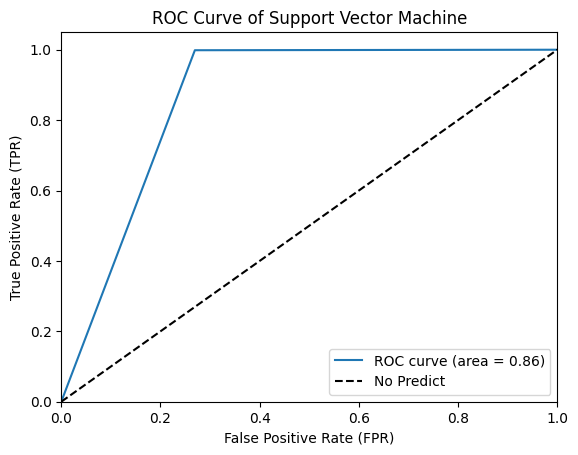

In [93]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred2)

# Calculate Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Predict')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve of Support Vector Machine')
plt.legend(loc="lower right")
plt.show()

Confusion Matrix for SVM model 

In [94]:
cf_matrix2= confusion_matrix(y_test, y_pred2)
# (tn, fp, fn, tp)
cf_matrix2

array([[ 7607,  2804],
       [   15, 10396]], dtype=int64)

<Axes: >

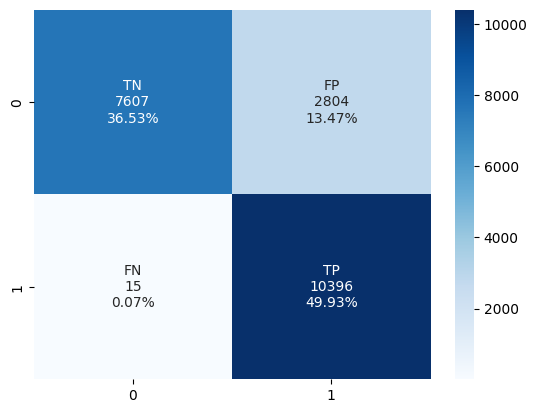

In [95]:
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix2.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix2.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix2, annot=labels, fmt='', cmap='Blues')

In [96]:
pickle.dump(clf2,open('SVMmodel.pkl','wb'))

2. MLP classifier and it's tuning

In [97]:
parameters = {'solver': ['adam','sgd'],'activation':['relu','tanh'], 'max_iter': [1250,1500,1750 ], 'alpha': 10.0 ** -np.arange(3, 8), 'hidden_layer_sizes':[8,10,12,14,16]}#'learning_rate':['adaptive','invscaling'],
clf = GridSearchCV(MLPClassifier(), parameters, n_jobs=-1)

clf.fit(x_valid, y_valid)
# print(clf.score(trainX, trainY))
print(clf.best_params_)
#{'alpha': 1e-05, 'hidden_layer_sizes': 10, 'max_iter': 1250, 'solver': 'lbfgs'}

{'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': 12, 'max_iter': 1750, 'solver': 'sgd'}


Results from using best Parameters

In [98]:
# tmlp=MLPClassifier(solver='adam',activation='logistic',max_iter=1500,alpha=0.001,learning_rate='constant',hidden_layer_sizes=16)
tmlp=MLPClassifier(solver='adam',activation='logistic',max_iter=1750,alpha=0.0001,learning_rate='adaptive',hidden_layer_sizes=14)
tmlp.fit(x_train,y_train)
y_pred=tmlp.predict(x_test)
print("score for MLP classifier using hyperparameter ",tmlp.score(x_test,y_test))
print(classification_report(y_test,y_pred))
print('ROC-AUC-Score' , roc_auc_score(y_test,y_pred))


score for MLP classifier using hyperparameter  0.8644702718278744
              precision    recall  f1-score   support

         0.0       1.00      0.73      0.84     10411
         1.0       0.79      1.00      0.88     10411

    accuracy                           0.86     20822
   macro avg       0.89      0.86      0.86     20822
weighted avg       0.89      0.86      0.86     20822

ROC-AUC-Score 0.8644702718278743


Confusion matrix for MLP classifier

<Axes: >

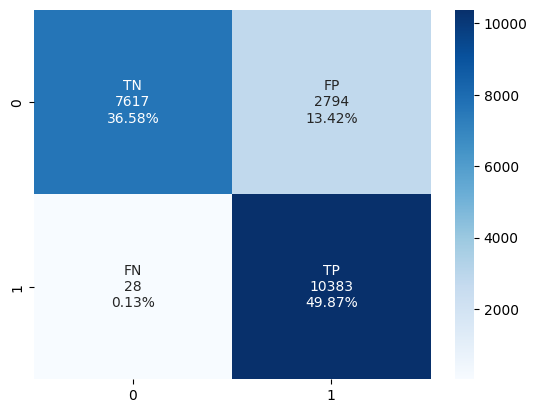

In [99]:
cf_matrix=confusion_matrix(y_test, y_pred)
roup_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')


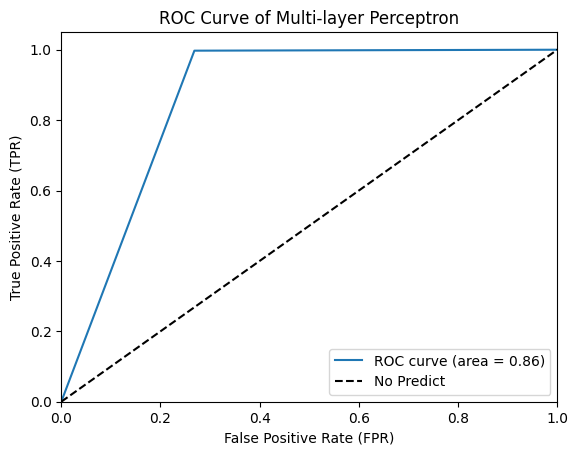

In [100]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Predict')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve of Multi-layer Perceptron')
plt.legend(loc="lower right")
plt.show()

Checking underfiting and overfiting

Text(0.5, 1.0, 'error Vs iteration curve ')

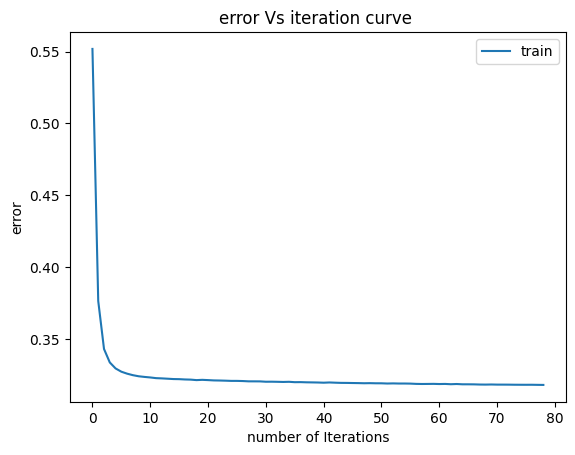

In [101]:

train = tmlp.loss_curve_
plt.plot(train, label='train')
plt.legend()
plt.xlabel("number of Iterations")
plt.ylabel("error")
plt.title("error Vs iteration curve ")

In [102]:
import numpy as np
acc_score_test = []
acc_score_train = []

kf = KFold(n_splits=5)

for train_index, test_index in kf.split(x_train):

    xtrain, xtest = x_train[train_index], x_train[test_index]
    ytrain, ytest = y_train[train_index], y_train[test_index]

    xb=MLPClassifier(solver='adam',activation='logistic',max_iter=1750,alpha=0.0001,learning_rate='adaptive',hidden_layer_sizes=14)
    xb.fit(xtrain,ytrain)
    pred1 = xb.predict(xtest)
    pred2=xb.predict(xtrain)
    acc_score_test.append(accuracy_score(pred1, ytest))
    acc_score_train.append(accuracy_score(pred2, ytrain))

print("test accuracy ",acc_score_test)
print("train accuracy ",acc_score_train)

test accuracy  [0.8623932764140875, 0.86292689434365, 0.8614594450373533, 0.8635272145144077, 0.8657194316589953]
train accuracy  [0.8636750212616939, 0.8636583454233162, 0.8639251588373605, 0.8635749662314273, 0.8633437833511206]


In [103]:
pickle.dump(tmlp,open('MLP.pkl','wb'))

In [104]:
x_train

array([[ 0.1471129 , -2.71300361, -0.37387218, ..., -0.07716519,
        -0.03196244, -0.03586574],
       [-0.81672037,  0.64228219, -0.93433624, ..., -0.07716519,
        -0.03196244, -0.03586574],
       [-1.11484826,  1.32273115, -0.97315836, ..., -0.07716519,
        -0.03196244, -0.03586574],
       ...,
       [-0.68477184,  0.53484288, -0.72585773, ..., -0.07716519,
        -0.03196244, -0.03586574],
       [ 0.36098545, -0.18141918, -0.20671401, ..., -0.07716519,
        -0.03196244, -0.03586574],
       [-0.86409955,  0.65521594,  0.76912892, ..., -0.07716519,
        -0.03196244, -0.03586574]])

Gradient Boosting Classifier tuning

In [105]:
parameters = {'loss': ['ls', 'lad', 'huber'],
                       'n_estimators': [100, 500, 100],
                       'max_depth': [2, 3, 5, 10],
                       'min_samples_leaf': [2, 4, 6],
                       'min_samples_split': [2, 4, 6],
                       'max_features': ['auto', 'sqrt', 'log2', None]}
clf = GridSearchCV(XGBClassifier(), parameters, cv=3)

clf.fit(x_valid, y_valid)
# print(clf.score(trainX, trainY))
print(clf.best_params_)

{'loss': 'ls', 'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


Gradient boosting classifier results

In [106]:
model = XGBClassifier(loss = 'ls', max_depth = 2,
                                  n_estimators=500,
                                  min_samples_leaf = 2,
                                  min_samples_split = 2,
                                  max_features = 'auto',
                                  random_state = 42)
model.fit(x_train,y_train)
print("score for Gradient boosting classifier using hyperparameter ",model.score(x_test,y_test))
y_pred=model.predict(x_test)
print(classification_report(y_test,y_pred))
print('ROC-AUC-Score' , roc_auc_score(y_test,y_pred))

score for Gradient boosting classifier using hyperparameter  0.8664393430025934
              precision    recall  f1-score   support

         0.0       1.00      0.74      0.85     10411
         1.0       0.79      1.00      0.88     10411

    accuracy                           0.87     20822
   macro avg       0.89      0.87      0.86     20822
weighted avg       0.89      0.87      0.86     20822

ROC-AUC-Score 0.8664393430025934


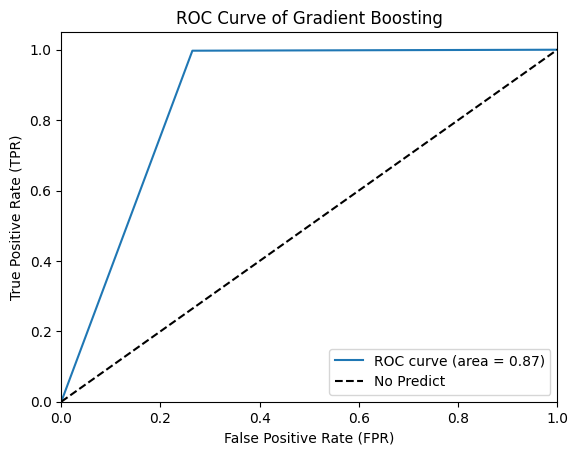

In [107]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Predict')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve of Gradient Boosting')
plt.legend(loc="lower right")
plt.show()

It's confusion matrix

<Axes: >

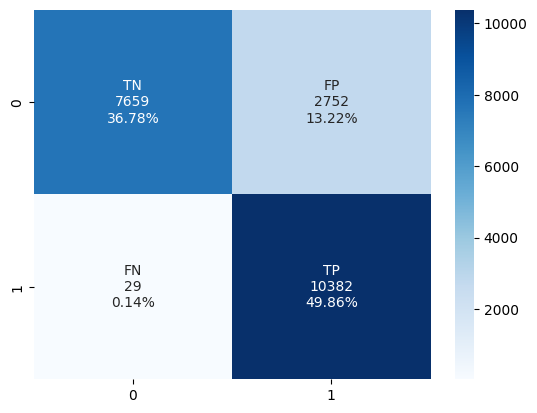

In [108]:
cf_matrix=confusion_matrix(y_test, y_pred)
roup_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')


Checking undefit and overfit

In [109]:
import numpy as np
acc_score_test = []
acc_score_train = []

kf = KFold(n_splits=5)

for train_index, test_index in kf.split(x_train):

    xtrain, xtest = x_train[train_index], x_train[test_index]
    ytrain, ytest = y_train[train_index], y_train[test_index]

    xb=XGBClassifier(loss = 'ls', max_depth = 2,
                                  n_estimators=500,
                                  min_samples_leaf = 2,
                                  min_samples_split = 2,
                                  max_features = 'auto',
                                  random_state = 42)
    xb.fit(xtrain,ytrain)
    pred1 = xb.predict(xtest)
    pred2=xb.predict(xtrain)
    acc_score_test.append(accuracy_score(pred1, ytest))
    acc_score_train.append(accuracy_score(pred2, ytrain))

print("test errors ",acc_score_test)
print("train errors ",acc_score_train)

test errors  [0.8643276414087513, 0.8639274279615795, 0.8631937033084311, 0.8653948772678762, 0.8683876992862384]
train errors  [0.8664098587556489, 0.8670268647756266, 0.8664932379475379, 0.8659929627962045, 0.8658117662753468]


In [110]:
pickle.dump(model,open('GBC.pkl','wb'))

In [111]:
model.predict([x_test[1]])

array([1])

Voting Classifier

In [112]:
from sklearn.ensemble import VotingClassifier
estimator = []
estimator.append(('MLP', 
                  MLPClassifier(solver='adam',activation='logistic',max_iter=1750,alpha=0.0001,learning_rate='adaptive',hidden_layer_sizes=14)))
estimator.append(('GB', XGBClassifier(loss = 'ls', max_depth = 2,
                                  n_estimators=500,
                                  min_samples_leaf = 2,
                                  min_samples_split = 2,
                                  max_features = 'auto',
                                  random_state = 42)))
estimator.append(('RF', RandomForestClassifier(criterion='gini',max_depth=None,max_features='log2',n_estimators=500)))

# svm_clf = svm.SVC(kernel='linear', C=1.0)  # Replace with your preferred parameters

# # Create a list of estimators (models) to include in the voting classifier
# estimator.append(('svm', svm_clf))

# Voting Classifier with hard voting
vot_hard = VotingClassifier(estimators = estimator, voting ='hard')
vot_hard.fit(x_train, y_train)
y_predh = vot_hard.predict(x_test)
  

score = accuracy_score(y_test, y_predh)
print("Hard Voting Score ", score)
  
# Voting Classifier with soft voting
vot_soft = VotingClassifier(estimators = estimator, voting ='soft')
vot_soft.fit(x_train, y_train)
y_preds = vot_soft.predict(x_test)
  
# using accuracy_score
score = accuracy_score(y_test, y_preds)
print("Soft Voting Score ", score)

Hard Voting Score  0.8673038132744213
Soft Voting Score  0.8692728844491403


Results from Hard voting

In [113]:
print("score from hard_voting ",vot_hard.score(x_test,y_test))
y_predh=vot_hard.predict(x_test)
print(classification_report(y_test,y_predh))
print('ROC-AUC-Score' , roc_auc_score(y_test,y_predh))

score from hard_voting  0.8673038132744213
              precision    recall  f1-score   support

         0.0       1.00      0.74      0.85     10411
         1.0       0.79      1.00      0.88     10411

    accuracy                           0.87     20822
   macro avg       0.89      0.87      0.86     20822
weighted avg       0.89      0.87      0.86     20822

ROC-AUC-Score 0.8673038132744213


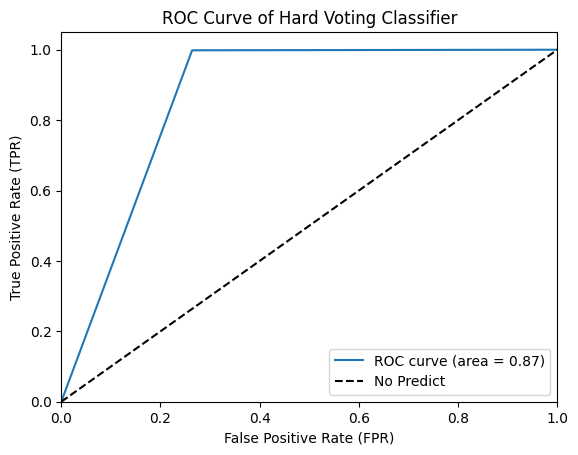

In [114]:
fpr, tpr, thresholds = roc_curve(y_test, y_predh)

# Calculate Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Predict')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve of Hard Voting Classifier')
plt.legend(loc="lower right")
plt.show()

<Axes: >

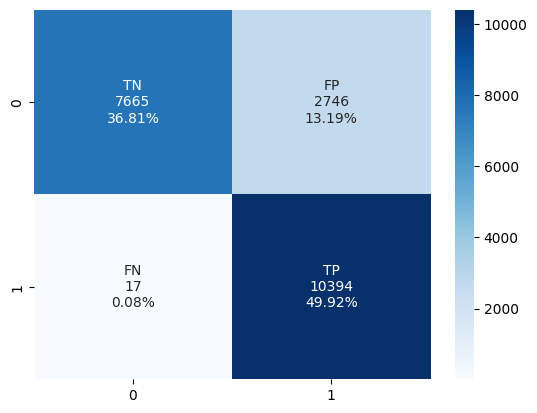

In [115]:
cf_matrix=confusion_matrix(y_test, y_predh)
roup_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

Results from Soft Voting

In [116]:
print("score from Soft_voting ",vot_soft.score(x_test,y_test))
y_preds=vot_soft.predict(x_test)
print(classification_report(y_test,y_pred))
print('ROC-AUC-Score' , roc_auc_score(y_test,y_pred))

score from Soft_voting  0.8692728844491403
              precision    recall  f1-score   support

         0.0       1.00      0.74      0.85     10411
         1.0       0.79      1.00      0.88     10411

    accuracy                           0.87     20822
   macro avg       0.89      0.87      0.86     20822
weighted avg       0.89      0.87      0.86     20822

ROC-AUC-Score 0.8664393430025934


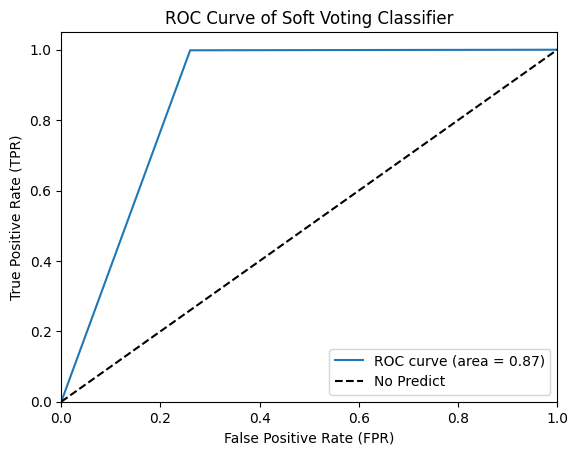

In [117]:
fpr, tpr, thresholds = roc_curve(y_test, y_preds)

# Calculate Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Predict')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve of Soft Voting Classifier')
plt.legend(loc="lower right")
plt.show()

<Axes: >

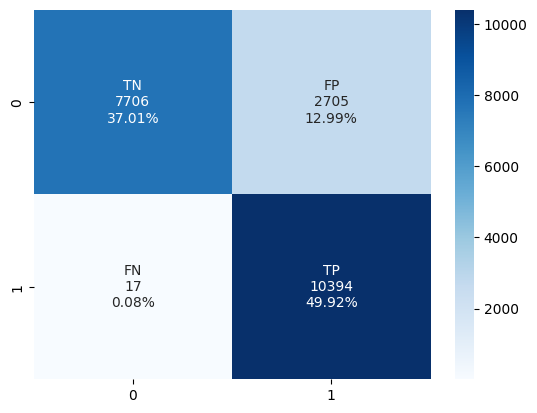

In [118]:
cf_matrix=confusion_matrix(y_test, y_preds)
roup_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [119]:
pickle.dump(vot_hard,open('HardVoting.pkl','wb'))

In [120]:
pickle.dump(vot_soft,open('SoftVoting.pkl','wb'))

In [121]:
lr.predict([x_test[10]])

array([0.])

In [122]:
rfc.predict([x_test[10]])

array([0.])

In [123]:
clf2.predict([x_test[10]])

array([0.])

In [124]:
tmlp.predict([x_test[10]])

array([0.])

In [125]:
model.predict([x_test[10]])

array([0])

In [126]:
vot_hard.predict([x_test[10]])

array([0.])

In [127]:
vot_soft.predict([x_test[10]])

array([0.])